# Ridge Classifier

### Loading...

In [2]:
model = catalog.load('model')

2022-04-18 10:46:16,816 - kedro.io.data_catalog - INFO - Loading data from `model` (PickleDataSet)...


/home/lilivah/defy/defy/venv/lib/python3.8/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/home/lilivah/defy/defy/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/lilivah/defy/defy/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [1]:
x_train = catalog.load('x_train')
x_test = catalog.load('x_test')
y_train = catalog.load('y_train')
y_test = catalog.load('y_test')

2022-04-18 10:46:13,965 - kedro.io.data_catalog - INFO - Loading data from `x_train` (CSVDataSet)...
2022-04-18 10:46:15,653 - kedro.io.data_catalog - INFO - Loading data from `x_test` (CSVDataSet)...
2022-04-18 10:46:15,900 - kedro.io.data_catalog - INFO - Loading data from `y_train` (CSVDataSet)...
2022-04-18 10:46:15,906 - kedro.io.data_catalog - INFO - Loading data from `y_test` (CSVDataSet)...


In [11]:
## import eli5
# Importing eli5 here is causing issues. You can check the picture at the notebook/imgs/ 
# folder to get a glance of the show_weights eli5 function, which I could get from 
# running it on Google Colab framework.

In [13]:
y_pred = model.predict(x_test)

In [15]:
print(y_pred)

[0 0 0 ... 0 0 0]


### Metrics

In [6]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, precision_recall_curve, roc_curve, roc_auc_score


In [24]:
model_accuracy = accuracy_score(y_test, y_pred)
print(model_accuracy)

0.966583344296803


In [25]:
model_f1 = f1_score(y_test, y_pred, average='macro')
print(model_f1)

0.7398736321886934


In [ ]:
model_precision = precision_score(y_test, y_pred)
print(model_precision)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14443   492]
 [   16   251]]


In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cost = fp*10 + fn*500
print(cost)

12920


# Random Forest Classifier

In [3]:
rfc = catalog.load('randomforestclassifier')

2022-04-18 10:46:21,716 - kedro.io.data_catalog - INFO - Loading data from `randomforestclassifier` (PickleDataSet)...


In [4]:
y_pred = rfc.predict(x_test)

In [7]:
model_accuracy = accuracy_score(y_test, y_pred)
print(model_accuracy)

0.9926983291672148


In [8]:
model_f1 = f1_score(y_test, y_pred, average='macro')
print(model_f1)

0.8924282224017824


In [14]:
model_precision = precision_score(y_test, y_pred)
print(model_precision)

0.8023255813953488


In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14884    51]
 [   60   207]]


In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cost = fp*10 + fn*500
print(cost)

30510


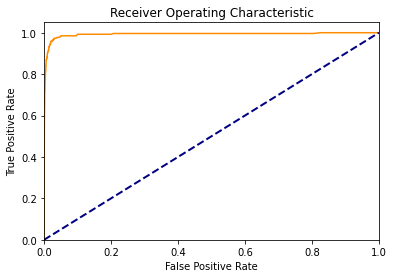

In [15]:
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()